In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


from scipy.stats import spearmanr

In [2]:
%matplotlib notebook

# Plot Playground

This notebook is exploratory in nature and designed to look at various correlations in the early light curve data from the ZTF 2018 sample. 

In [3]:
info_path="../../forced_lightcurves/sample_lc_v2/"
salt_df = pd.read_csv(info_path + "../../Nobs_cut_salt2_spec_subtype_pec.csv")
res = pd.read_csv('results_40percent.csv')

The useful columns from this database for plotting purposes: 

    name –– ZTF name of the SN
    z_adopt –– redshift of the SN
    z_source –– where the redshift was identified
    x1_salt2 –– SALT shape parameter
    c_salt2 –– SALT color parameter
    dm15B_rest –– Delta M15 measured in the B band, in the SN rest frame
    Ia subtype –– the SN subtype
    B_abs0_SALT2corr –– B-band absolute mag
    t0 –– time of first light
    t_rise –– rise time of the SN
    alpha_g –– rising index in the g-band
    alpha_r –– rising index in the r-band

In [4]:
salt_df['Ia subtype'].unique()

array(['normal', 'normal*', '99aa-like', 'SC*', '91T-like*', 'Ia-CSM',
       '02cx-like', '86G-like', 'SC', '99aa-like*', '91T-like'],
      dtype=object)

In [5]:
normal = np.where((salt_df['Ia subtype'] != 'Ia-CSM') & 
                  (salt_df['Ia subtype'] != 'SC') & 
                  (salt_df['Ia subtype'] != 'SC*') & 
                  (salt_df['Ia subtype'] != '86G-like') & 
                  (salt_df['Ia subtype'] != '02cx-like'))
good = np.where((res.final_selection.values == 1))
has_host_z = np.where(salt_df.z_source != 'Msl')

normal_good = np.intersect1d(normal, good)
normal_good_host = np.intersect1d(normal_good, has_host_z)

# rearange for plotting
normal_plot = np.setdiff1d(normal[0], normal_good)
normal_good_plot = np.setdiff1d(normal_good, normal_good_host)

## Plots

In [6]:
t_rise = res['t_rise_50'].values
t_rise_unc = np.vstack((res['t_rise_50'] - res['t_rise_05'],
                    res['t_rise_95'] - res['t_rise_50'])) 
alpha_g = res['flat_alpha_g_50'].values
alpha_g_unc = np.vstack((res['flat_alpha_g_50'] - res['flat_alpha_g_05'],
                         res['flat_alpha_g_95'] - res['flat_alpha_g_50']))
alpha_r = res['flat_alpha_r_50'].values
alpha_r_unc = np.vstack((res['flat_alpha_r_50'] - res['flat_alpha_r_05'],
                         res['flat_alpha_r_95'] - res['flat_alpha_r_50']))

<IPython.core.display.Javascript object>


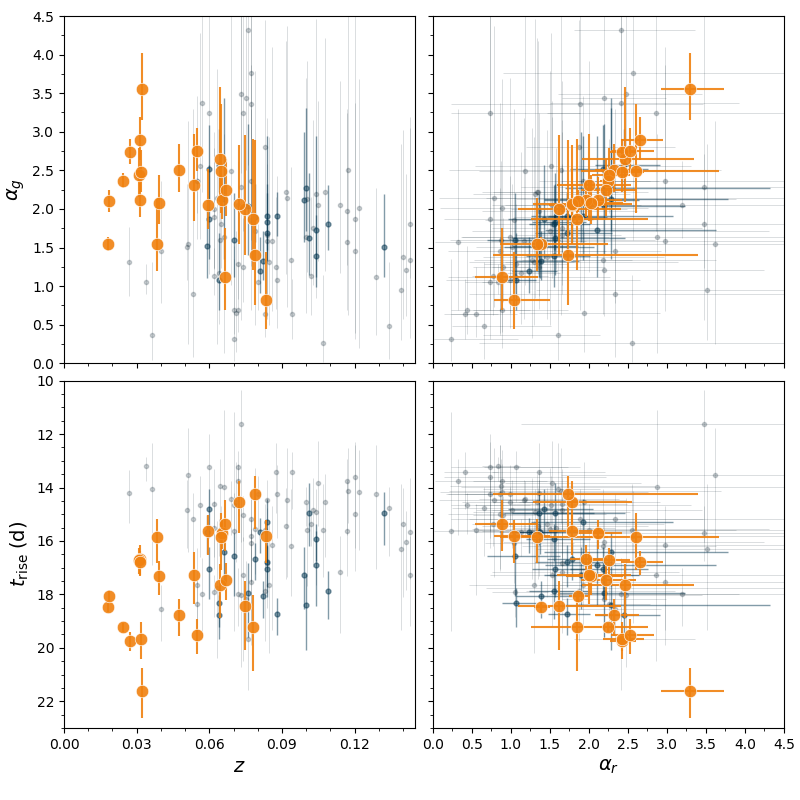

In [7]:
color_dict = {'orange': '#F0810F',
              'blueberry': '#063852',
              'dark navy': '#011A27'}

fig, axes = plt.subplots(2,2, figsize=(8,8))
#  alpha_g vs. redshift
axes[0,0].errorbar(salt_df.z_adopt.values[normal_plot], alpha_g[normal_plot], 
             yerr=alpha_g_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[0,0].errorbar(salt_df.z_adopt.values[normal_good_plot], alpha_g[normal_good_plot], 
             yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[0,0].errorbar(salt_df.z_adopt.values[normal_good_host], alpha_g[normal_good_host], 
             yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

#  rise vs. redshift
axes[1,0].errorbar(salt_df.z_adopt.values[normal_plot], t_rise[normal_plot], 
             yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[1,0].errorbar(salt_df.z_adopt.values[normal_good_plot], t_rise[normal_good_plot], 
             yerr=t_rise_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[1,0].errorbar(salt_df.z_adopt.values[normal_good_host], t_rise[normal_good_host], 
             yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

#  alpha_g vs. alpha_r
axes[0,1].errorbar(alpha_r[normal_plot], alpha_g[normal_plot], 
                   xerr=alpha_r_unc[:,normal_plot], 
                   yerr=alpha_g_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[0,1].errorbar(alpha_r[normal_good_plot], alpha_g[normal_good_plot], 
                   xerr=alpha_r_unc[:,normal_good_plot], 
             yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[0,1].errorbar(alpha_r[normal_good_host], alpha_g[normal_good_host], 
                   xerr=alpha_r_unc[:,normal_good_host], 
             yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

#  t_rise vs. alpha_r
axes[1,1].errorbar(alpha_r[normal_plot], t_rise[normal_plot], 
                   xerr=alpha_r_unc[:,normal_plot], 
                   yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[1,1].errorbar(alpha_r[normal_good_plot], t_rise[normal_good_plot], 
                   xerr=alpha_r_unc[:,normal_good_plot], 
                   yerr=t_rise_unc[:,normal_good_plot], fmt='.',
                   color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[1,1].errorbar(alpha_r[normal_good_host], t_rise[normal_good_host], 
                   xerr=alpha_r_unc[:,normal_good_host], 
                   yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
                   color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

for ax in axes[0,:]:
    ax.set_ylabel(r'$\alpha_g$', fontsize=14)
    ax.set_ylim(0,4.5)
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))

for ax in axes[1,:]:
    ax.set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)
    ax.set_ylim(23,10)
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_locator(MultipleLocator(2))

for ax in axes[:,0]:
    ax.set_xlabel(r'$z$', fontsize=14)
    ax.set_xlim(0,0.145)
    ax.xaxis.set_minor_locator(MultipleLocator(0.01))
    ax.xaxis.set_major_locator(MultipleLocator(0.03))

for ax in axes[:,1]:
    ax.set_xlabel(r'$\alpha_r$', fontsize=14)
    ax.set_xlim(0,4.5)
    ax.xaxis.set_minor_locator(MultipleLocator(0.25))
    ax.xaxis.set_major_locator(MultipleLocator(0.5))

for ax in axes[0,:]:
    ax.set_xticklabels([])
    ax.set_xlabel('')

for ax in axes[:,1]:
    ax.set_yticklabels([])
    ax.set_ylabel('')

# for ax in axes.flatten():
#     ax.tick_params(top=True,right=True,which='both', labelsize=11)
    
fig.subplots_adjust(top=0.98,right=0.98,left=0.08,bottom=0.09,hspace=0.05, wspace=0.05)
fig.savefig('../paper/figures/param_correlations.pdf')

In [8]:
print('Correlating redshift and alpha_g:')
rho, p = spearmanr(salt_df.z_adopt.values[normal_good_host], alpha_g[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.z_adopt.values[normal_good], alpha_g[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.z_adopt.values[normal], alpha_g[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))

print('Correlating redshift and alpha_r:')
rho, p = spearmanr(salt_df.z_adopt.values[normal_good_host], alpha_r[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.z_adopt.values[normal_good], alpha_r[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.z_adopt.values[normal], alpha_r[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))

print('Correlating alpha_g and alpha_r:')
rho, p = spearmanr(alpha_g[normal_good_host], alpha_r[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(alpha_g[normal_good], alpha_r[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(alpha_g[normal], alpha_r[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))

print('Correlating redshift and rise time:')
rho, p = spearmanr(salt_df.z_adopt.values[normal_good_host], t_rise[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.z_adopt.values[normal_good], t_rise[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.z_adopt.values[normal], t_rise[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))

print('Correlating alpha_g and rise time:')
rho, p = spearmanr(alpha_g[normal_good_host], t_rise[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(alpha_g[normal_good], t_rise[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(alpha_g[normal], t_rise[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))

print('Correlating alpha_r and rise time:')
rho, p = spearmanr(alpha_r[normal_good_host], t_rise[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(alpha_r[normal_good], t_rise[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(alpha_r[normal], t_rise[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))


Correlating redshift and alpha_g:
	For good w/ hosts: rho = -0.4354, p = 0.0296
	For good: rho = -0.5128, p = 0.0002
	For all: rho = -0.2645, p = 0.0035
Correlating redshift and alpha_r:
	For good w/ hosts: rho = -0.3500, p = 0.0863
	For good: rho = -0.3923, p = 0.0064
	For all: rho = -0.3044, p = 0.0007
Correlating alpha_g and alpha_r:
	For good w/ hosts: rho = 0.9677, p = 0.0000
	For good: rho = 0.9340, p = 0.0000
	For all: rho = 0.5503, p = 0.0000
Correlating redshift and rise time:
	For good w/ hosts: rho = -0.4746, p = 0.0165
	For good: rho = -0.3388, p = 0.0198
	For all: rho = -0.2679, p = 0.0031
Correlating alpha_g and rise time:
	For good w/ hosts: rho = 0.5546, p = 0.0040
	For good: rho = 0.4846, p = 0.0006
	For all: rho = 0.4146, p = 0.0000
Correlating alpha_r and rise time:
	For good w/ hosts: rho = 0.5131, p = 0.0087
	For good: rho = 0.4702, p = 0.0009
	For all: rho = 0.5287, p = 0.0000


## $X_1$ vs. rise time

<IPython.core.display.Javascript object>


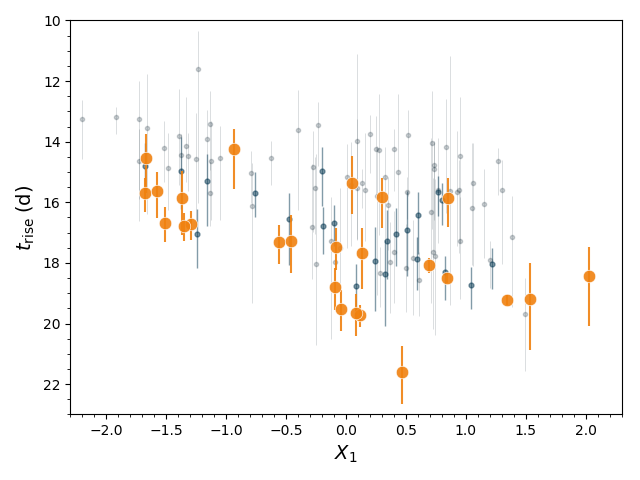

In [9]:
fig, ax = plt.subplots()

#  rise vs. redshift
ax.errorbar(salt_df.x1_salt2.values[normal_plot], t_rise[normal_plot], 
             yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax.errorbar(salt_df.x1_salt2.values[normal_good_plot], t_rise[normal_good_plot], 
             yerr=t_rise_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax.errorbar(salt_df.x1_salt2.values[normal_good_host], t_rise[normal_good_host], 
             yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

ax.set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)
ax.set_ylim(23,10)
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(2))

ax.set_xlabel(r'$X_1$', fontsize=14)
ax.set_xlim(-2.3,2.3)
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

fig.tight_layout()

In [10]:
z_cut = 0.04
low_cut = 0.04
high_cut = 0.065
low_z = np.where(salt_df.z_adopt <= z_cut)
mid_z = np.where((low_cut < salt_df.z_adopt) & (salt_df.z_adopt <= high_cut))
high_z = np.where(salt_df.z_adopt > high_cut)

good_host_low_z = np.intersect1d(normal_good_host, low_z[0])
good_host_mid_z = np.intersect1d(normal_good_host, mid_z[0])
good_host_high_z = np.intersect1d(normal_good_host, high_z[0])

<IPython.core.display.Javascript object>


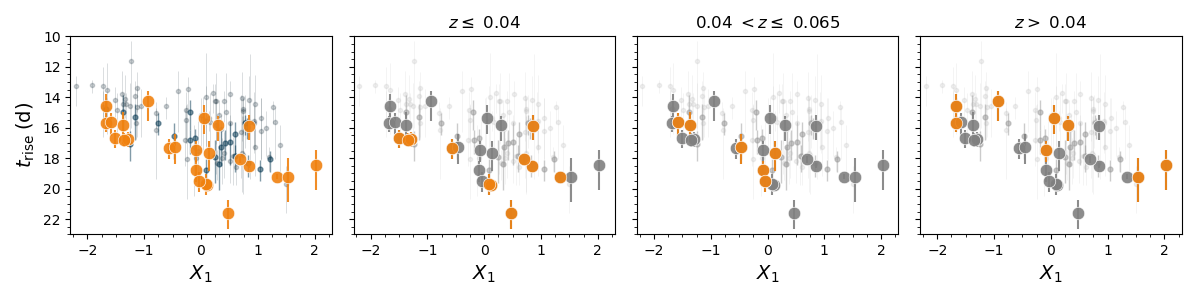

In [11]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, sharex=True, sharey=True, figsize=(12,3))

#  rise vs. redshift
ax0.errorbar(salt_df.x1_salt2.values[normal_plot], t_rise[normal_plot], 
             yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax0.errorbar(salt_df.x1_salt2.values[normal_good_plot], t_rise[normal_good_plot], 
             yerr=t_rise_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax0.errorbar(salt_df.x1_salt2.values[normal_good_host], t_rise[normal_good_host], 
             yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

for ax in [ax1, ax2, ax3]:
    ax.errorbar(salt_df.x1_salt2.values[normal_plot], t_rise[normal_plot], 
                yerr=t_rise_unc[:,normal_plot], fmt='.', 
                color='0.7', lw=0.5, alpha=0.2)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_plot], t_rise[normal_good_plot], 
                yerr=t_rise_unc[:,normal_good_plot], fmt='.',
                color='0.6', lw=1, ms=7, alpha=0.5)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_host], t_rise[normal_good_host], 
                yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
                color='0.5', mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
    ax.set_xlabel(r'$X_1$', fontsize=14)

ax1.errorbar(salt_df.x1_salt2.values[good_host_low_z], t_rise[good_host_low_z], 
             yerr=t_rise_unc[:,good_host_low_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
ax1.set_title(r'$z \leq$ {}'.format(z_cut),fontsize=12)
ax2.errorbar(salt_df.x1_salt2.values[good_host_mid_z], t_rise[good_host_mid_z], 
             yerr=t_rise_unc[:,good_host_mid_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
ax2.set_title(r'{} $< z \leq$ {}'.format(low_cut, high_cut),fontsize=12)
ax3.errorbar(salt_df.x1_salt2.values[good_host_high_z], t_rise[good_host_high_z], 
             yerr=t_rise_unc[:,good_host_high_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
ax3.set_title(r'$z >$ {}'.format(z_cut),fontsize=12)

ax0.set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)
ax0.set_ylim(23,10)
ax0.yaxis.set_minor_locator(MultipleLocator(0.5))
ax0.yaxis.set_major_locator(MultipleLocator(2))

ax0.set_xlabel(r'$X_1$', fontsize=14)
ax0.set_xlim(-2.3,2.3)
ax0.xaxis.set_minor_locator(MultipleLocator(0.25))
ax0.xaxis.set_major_locator(MultipleLocator(1))

fig.tight_layout()

## $X_1$ vs. $\alpha$

<IPython.core.display.Javascript object>


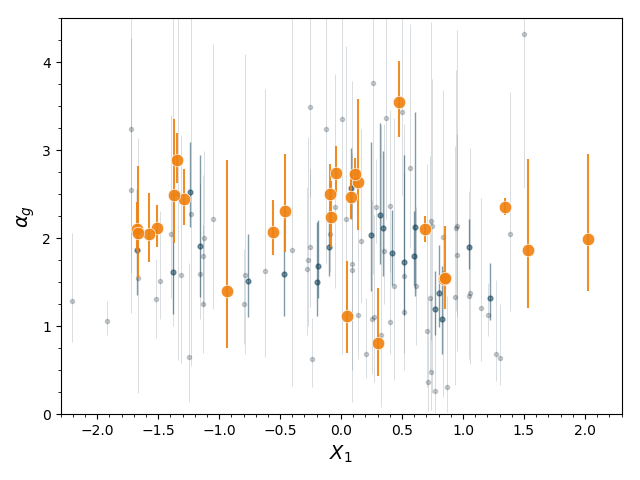

In [12]:
fig, ax = plt.subplots()

#  rise vs. redshift
ax.errorbar(salt_df.x1_salt2.values[normal_plot], alpha_g[normal_plot], 
             yerr=alpha_g_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax.errorbar(salt_df.x1_salt2.values[normal_good_plot], alpha_g[normal_good_plot], 
             yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax.errorbar(salt_df.x1_salt2.values[normal_good_host], alpha_g[normal_good_host], 
             yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

ax.set_ylabel(r'$\alpha_g$', fontsize=14)
ax.set_ylim(0,4.5)
ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(1))

ax.set_xlabel(r'$X_1$', fontsize=14)
ax.set_xlim(-2.3,2.3)
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_major_locator(MultipleLocator(0.5))

fig.tight_layout()

<IPython.core.display.Javascript object>


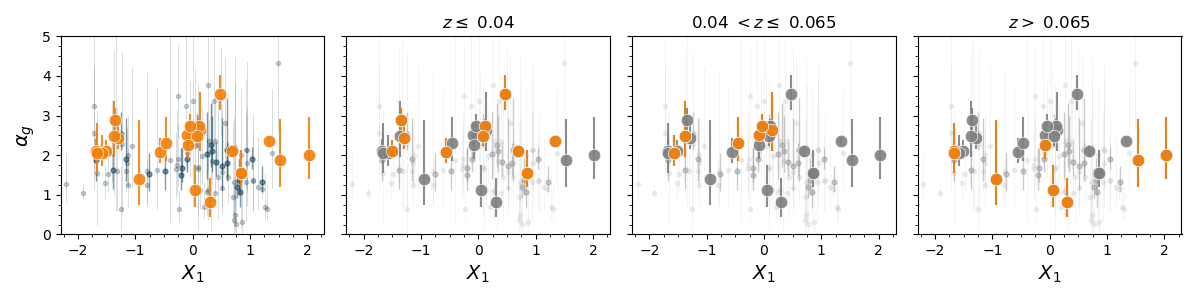

In [13]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, sharex=True, sharey=True, figsize=(12,3))

#  rise vs. redshift
ax0.errorbar(salt_df.x1_salt2.values[normal_plot], alpha_g[normal_plot], 
             yerr=alpha_g_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax0.errorbar(salt_df.x1_salt2.values[normal_good_plot], alpha_g[normal_good_plot], 
             yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax0.errorbar(salt_df.x1_salt2.values[normal_good_host], alpha_g[normal_good_host], 
             yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

for ax in [ax1, ax2, ax3]:
    ax.errorbar(salt_df.x1_salt2.values[normal_plot], alpha_g[normal_plot], 
                 yerr=alpha_g_unc[:,normal_plot], fmt='.', 
                  color='0.7', lw=0.5, alpha=0.2)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_plot], alpha_g[normal_good_plot], 
                 yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
                 color='0.6', lw=1, ms=7, alpha=0.5)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_host], alpha_g[normal_good_host], 
                 yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
                 color='0.5', mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
    ax.set_xlabel(r'$X_1$', fontsize=14)

ax1.errorbar(salt_df.x1_salt2.values[good_host_low_z], alpha_g[good_host_low_z], 
             yerr=alpha_g_unc[:,good_host_low_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
ax1.set_title(r'$z \leq$ {}'.format(low_cut),fontsize=12)
ax2.errorbar(salt_df.x1_salt2.values[good_host_mid_z], alpha_g[good_host_mid_z], 
             yerr=alpha_g_unc[:,good_host_mid_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
ax2.set_title(r'{} $< z \leq$ {}'.format(low_cut, high_cut),fontsize=12)
ax3.errorbar(salt_df.x1_salt2.values[good_host_high_z], alpha_g[good_host_high_z], 
             yerr=alpha_g_unc[:,good_host_high_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
ax3.set_title(r'$z >$ {}'.format(high_cut),fontsize=12)

ax0.set_ylabel(r'$\alpha_g$', fontsize=14)
ax0.set_ylim(0,5)
ax0.yaxis.set_minor_locator(MultipleLocator(0.25))
ax0.yaxis.set_major_locator(MultipleLocator(1))

ax0.set_xlabel(r'$X_1$', fontsize=14)
ax0.set_xlim(-2.3,2.3)
ax0.xaxis.set_minor_locator(MultipleLocator(0.25))
ax0.xaxis.set_major_locator(MultipleLocator(1))

fig.tight_layout()

### Put these all together

<IPython.core.display.Javascript object>


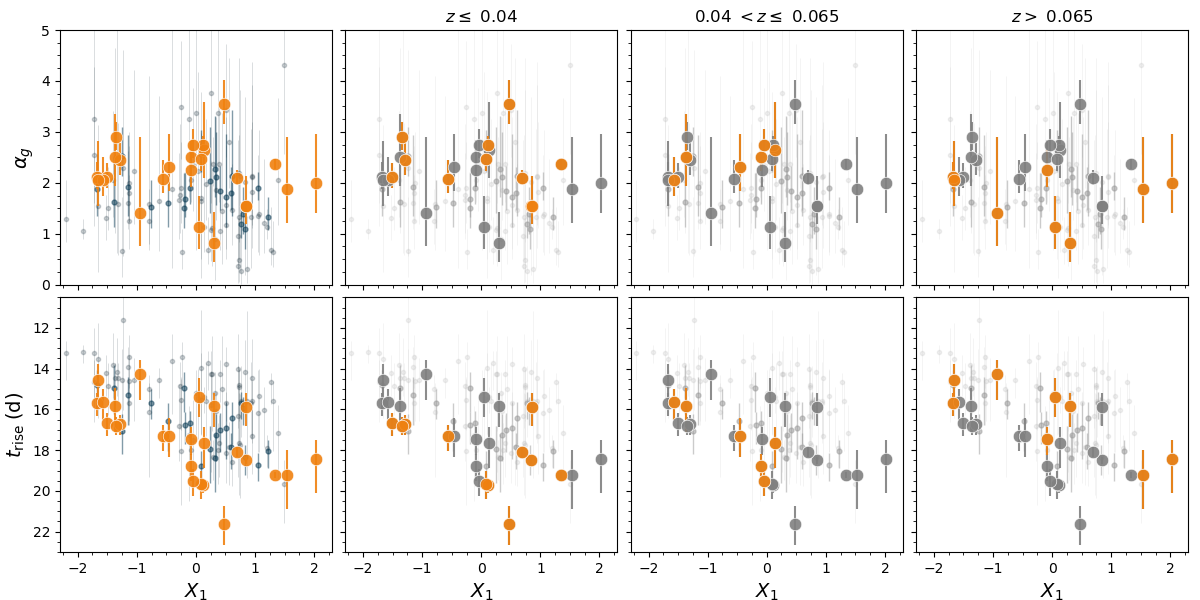

In [14]:
fig, axes = plt.subplots(2,4, sharex=True, sharey=False, figsize=(12,6))


axes[0,0].errorbar(salt_df.x1_salt2.values[normal_plot], alpha_g[normal_plot], 
             yerr=alpha_g_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[0,0].errorbar(salt_df.x1_salt2.values[normal_good_plot], alpha_g[normal_good_plot], 
             yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[0,0].errorbar(salt_df.x1_salt2.values[normal_good_host], alpha_g[normal_good_host], 
             yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[0,0].set_ylabel(r'$\alpha_g$', fontsize=14)

for ax in axes[0,1:]:
    ax.errorbar(salt_df.x1_salt2.values[normal_plot], alpha_g[normal_plot], 
                 yerr=alpha_g_unc[:,normal_plot], fmt='.', 
                  color='0.7', lw=0.5, alpha=0.2)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_plot], alpha_g[normal_good_plot], 
                 yerr=alpha_g_unc[:,normal_good_plot], fmt='.',
                 color='0.6', lw=1, ms=7, alpha=0.5)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_host], alpha_g[normal_good_host], 
                 yerr=alpha_g_unc[:,normal_good_host], fmt='o', ms=9,
                 color='0.5', mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
#     ax.set_xlabel(r'$X_1$', fontsize=14)

axes[0,1].errorbar(salt_df.x1_salt2.values[good_host_low_z], alpha_g[good_host_low_z], 
             yerr=alpha_g_unc[:,good_host_low_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[0,1].set_title(r'$z \leq$ {}'.format(low_cut),fontsize=12)
axes[0,2].errorbar(salt_df.x1_salt2.values[good_host_mid_z], alpha_g[good_host_mid_z], 
             yerr=alpha_g_unc[:,good_host_mid_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[0,2].set_title(r'{} $< z \leq$ {}'.format(low_cut, high_cut),fontsize=12)
axes[0,3].errorbar(salt_df.x1_salt2.values[good_host_high_z], alpha_g[good_host_high_z], 
             yerr=alpha_g_unc[:,good_host_high_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[0,3].set_title(r'$z >$ {}'.format(high_cut),fontsize=12)

axes[1,0].errorbar(salt_df.x1_salt2.values[normal_plot], t_rise[normal_plot], 
             yerr=t_rise_unc[:,normal_plot], fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
axes[1,0].errorbar(salt_df.x1_salt2.values[normal_good_plot], t_rise[normal_good_plot], 
             yerr=t_rise_unc[:,normal_good_plot], fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
axes[1,0].errorbar(salt_df.x1_salt2.values[normal_good_host], t_rise[normal_good_host], 
             yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[1,0].set_ylim(23,10)
axes[1,0].set_ylabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)

for ax in axes[1,1:]:
    ax.errorbar(salt_df.x1_salt2.values[normal_plot], t_rise[normal_plot], 
                yerr=t_rise_unc[:,normal_plot], fmt='.', 
                color='0.7', lw=0.5, alpha=0.2)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_plot], t_rise[normal_good_plot], 
                yerr=t_rise_unc[:,normal_good_plot], fmt='.',
                color='0.6', lw=1, ms=7, alpha=0.5)
    ax.errorbar(salt_df.x1_salt2.values[normal_good_host], t_rise[normal_good_host], 
                yerr=t_rise_unc[:,normal_good_host], fmt='o', ms=9,
                color='0.5', mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
    ax.set_xlabel(r'$X_1$', fontsize=14)
    ax.set_ylim(23,10)

axes[1,1].errorbar(salt_df.x1_salt2.values[good_host_low_z], t_rise[good_host_low_z], 
             yerr=t_rise_unc[:,good_host_low_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[1,2].errorbar(salt_df.x1_salt2.values[good_host_mid_z], t_rise[good_host_mid_z], 
             yerr=t_rise_unc[:,good_host_mid_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)
axes[1,3].errorbar(salt_df.x1_salt2.values[good_host_high_z], t_rise[good_host_high_z], 
             yerr=t_rise_unc[:,good_host_high_z], fmt='o', ms=9,
             color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)


for axnum, ax in enumerate(axes[0,:]):
    ax.set_ylim(0,5)
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    if axnum > 0:
        ax.set_yticklabels([])

for axnum, ax in enumerate(axes[1,:]):
    ax.set_ylim(23,10.5)
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_locator(MultipleLocator(2))
    if axnum > 0:
        ax.set_yticklabels([])
        

axes[1,0].set_xlabel(r'$X_1$', fontsize=14)
axes[0,0].set_xlim(-2.3,2.3)
axes[0,0].xaxis.set_minor_locator(MultipleLocator(0.25))
axes[0,0].xaxis.set_major_locator(MultipleLocator(1))

fig.subplots_adjust(left=0.05,right=0.99,top=0.95,bottom=0.08,wspace=0.05,hspace=0.05)
fig.savefig('../paper/figures/shape_correlations.pdf')

In [15]:
print('Correlating X1 and rise time:')
rho, p = spearmanr(salt_df.x1_salt2.values[normal_good_host], t_rise[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.x1_salt2.values[normal_good], t_rise[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.x1_salt2.values[normal], t_rise[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))

print('Correlating X1 and alpha_g:')
rho, p = spearmanr(salt_df.x1_salt2.values[normal_good_host], alpha_g[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.x1_salt2.values[normal_good], alpha_g[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.x1_salt2.values[normal], alpha_g[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))

print('Correlating X1 and alpha_r:')
rho, p = spearmanr(salt_df.x1_salt2.values[normal_good_host], alpha_r[normal_good_host])
print('\tFor good w/ hosts: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.x1_salt2.values[normal_good], alpha_r[normal_good])
print('\tFor good: rho = {:.4f}, p = {:.4f}'.format(rho, p))
rho, p = spearmanr(salt_df.x1_salt2.values[normal], alpha_r[normal])
print('\tFor all: rho = {:.4f}, p = {:.4f}'.format(rho, p))


Correlating X1 and rise time:
	For good w/ hosts: rho = 0.6015, p = 0.0015
	For good: rho = 0.5645, p = 0.0000
	For all: rho = 0.4277, p = 0.0000
Correlating X1 and alpha_g:
	For good w/ hosts: rho = -0.1608, p = 0.4427
	For good: rho = -0.2391, p = 0.1055
	For all: rho = -0.1999, p = 0.0286
Correlating X1 and alpha_r:
	For good w/ hosts: rho = -0.1977, p = 0.3435
	For good: rho = -0.1850, p = 0.2131
	For all: rho = -0.0736, p = 0.4245


## $M_B$ vs. rise time

<IPython.core.display.Javascript object>


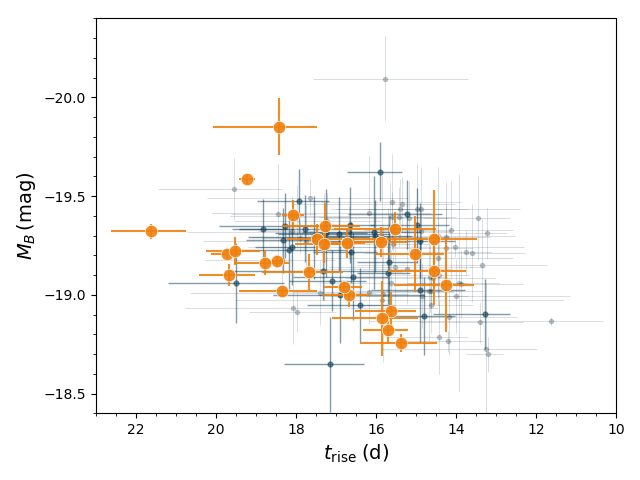

In [89]:
fig, ax = plt.subplots()

#  rise vs. redshift
ax.errorbar(t_rise[normal_plot], salt_df.B_abs0_SALT2corr.values[normal_plot],
            xerr=t_rise_unc[:,normal_plot], 
            yerr=salt_df.B_abs0_unc_SALT2corr.values[normal_plot],
            fmt='.', 
              color=color_dict['dark navy'], lw=0.5, alpha=0.2)
ax.errorbar(t_rise[normal_good_plot], salt_df.B_abs0_SALT2corr.values[normal_good_plot],
            xerr=t_rise_unc[:,normal_good_plot], 
            yerr=salt_df.B_abs0_unc_SALT2corr.values[normal_good_plot],
            fmt='.',
             color=color_dict['blueberry'], lw=1, ms=7, alpha=0.5)
ax.errorbar(t_rise[normal_good_host], salt_df.B_abs0_SALT2corr.values[normal_good_host],
            xerr=t_rise_unc[:,normal_good_host], 
            yerr=salt_df.B_abs0_unc_SALT2corr.values[normal_good_host],
            fmt='o', ms=9,
            color=color_dict['orange'], mec='w', mew=0.5, lw=1.5, alpha=0.9, zorder=10)

ax.set_xlabel(r'$t_\mathrm{rise}\;(\mathrm{d})$', fontsize=14)
ax.set_xlim(23,10)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(2))

ax.set_ylabel(r'$M_B \,(\mathrm{mag})$', fontsize=14)
ax.set_ylim(-18.4,-20.4)
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.5))

fig.tight_layout()